<a href="https://colab.research.google.com/github/Sushila-Phogat/Data-science-with-Python/blob/master/PreInterviewTask3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/colabtools/master/PreInterviewTaskData.csv')
data=df
data=pd.DataFrame(data)
data

,account,date,fraud,merchant
0,A0,01/01/2015,False,M98
1,A0,01/01/2015,False,M50
2,A0,01/01/2015,False,M55
3,A0,01/01/2015,False,M14
4,A0,01/01/2015,False,M10
...,...,...,...,...
89846,A998,30/01/2015,False,M70
89847,A998,30/01/2015,False,M67
89848,A999,30/01/2015,False,M59
89849,A999,30/01/2015,False,M42


In [37]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
len(set(data[(data['fraud'].astype(str).str.strip()=='True')]['account']).intersection(set(data[(data['fraud'].astype(str).str.strip()=='True')]['account'])))

617

In [8]:
# distribution of anomalous features
features = data.iloc[:,0:28].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, c in enumerate(data[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(data[c][data.fraud == "False"], bins=50)
 sns.distplot(data[c][data.fraud == "True"], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature: ' + str(c))
plt.show()

<Figure size 864x8064 with 0 Axes>

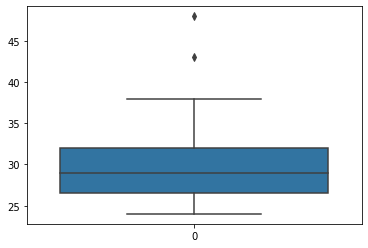

In [7]:
#maximum deFraud transaction by merchant and date
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M34')].groupby(['merchant','date']).count().sort_values(by='account',ascending=False).iloc[:,-1])



In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
random.seed(1)
anomalies = []

# multiply and add by random numbers to get some real values


# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in random_data:
        if outlier > upper_limit or outlier < lower_limit:
            print(outlier-upper_limit)
            anomalies.append(outlier)
    return anomalies

find_anomalies(data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M71')].groupby(['merchant','date']).count().sort_values(by='account',ascending=False).iloc[:,-1])

[]

In [35]:
data[(data['fraud'].astype(str).str.strip()=='False')][['merchant','date']].iloc[:,0]

0        M98
1        M50
2        M55
3        M14
4        M10
        ... 
89846    M70
89847    M67
89848    M59
89849    M42
89850    M75
Name: merchant, Length: 88503, dtype: object

In [0]:
#Fraud count by category
dt=data.groupby('fraud')['fraud'].count()
dt

fraud
False    88503
True      1348
Name: fraud, dtype: int64

In [0]:
#Unique accounts and merchant counts
dt=data['merchant'].unique()
dt2=data['account'].unique()
print("Count of unique Merchants used for transaction :" ,len(dt)," and count of unique accounts ",len(dt2))

Count of unique Merchants used for transaction : 100  and count of unique accounts  1000


In [0]:
#Count of Frauded accounts 
len(data[(data['fraud'].astype(str).str.strip()=='True')]['account'].unique())

617

In [0]:
#maximum Fraud by date
dt=data.query('fraud==True').groupby('date').count()
dt[dt['account']==max(dt['account'])]

,account,fraud,merchant
date,,,
22/01/2015,188,188,188


In [0]:
#maximum Fraud by merchant
data[(data['fraud'].astype(str).str.strip()=='True') ].groupby('merchant').count().sort_values(by='account',ascending=False)

,account,date,fraud
merchant,,,
M57,22,22,22
M10,21,21,21
M16,21,21,21
M79,20,20,20
M93,19,19,19
...,...,...,...
M39,8,8,8
M47,8,8,8
M34,6,6,6


In [2]:
#Farud dates
data[(data['fraud'].astype(str).str.strip()=='True') ].groupby(['date']).count()

,account,fraud,merchant
date,,,
01/01/2015,28,28,28
02/01/2015,30,30,30
03/01/2015,29,29,29
04/01/2015,20,20,20
05/01/2015,28,28,28
06/01/2015,41,41,41
07/01/2015,34,34,34
08/01/2015,27,27,27
09/01/2015,16,16,16


In [0]:
data[(data['fraud'].astype(str).str.strip()=='True') ].groupby(['date']).count()

In [0]:
#Checking merchants who are not involved in Fraud
merdt1=set(data[(data['fraud'].astype(str).str.strip()=='False')]['merchant'].unique())
merdt2=set(data[(data['fraud'].astype(str).str.strip()=='True')]['merchant'].unique())
merdt2.symmetric_difference(merdt1)

set()

In [3]:
#maximum deFraud transaction by merchant and date
data[(data['fraud'].astype(str).str.strip()=='False')].groupby(['merchant','date']).count().sort_values(by='account',ascending=False).iloc[:,-1].head(50)

merchant  date      
M0        01/01/2015    25
          02/01/2015    30
          03/01/2015    37
          04/01/2015    28
          05/01/2015    22
          06/01/2015    33
          07/01/2015    33
          08/01/2015    33
          09/01/2015    32
          10/01/2015    36
          11/01/2015    26
          12/01/2015    27
          13/01/2015    21
          14/01/2015    25
          15/01/2015    22
          16/01/2015    33
          17/01/2015    22
          18/01/2015    26
          19/01/2015    25
          20/01/2015    26
          21/01/2015    29
          22/01/2015    27
          23/01/2015    33
          24/01/2015    23
          25/01/2015    35
          26/01/2015    30
          27/01/2015    20
          28/01/2015    25
          29/01/2015    28
          30/01/2015    32
M1        01/01/2015    36
          02/01/2015    29
          03/01/2015    31
          04/01/2015    32
          05/01/2015    30
          06/01/2015    21
       

In [34]:
maxacnt=0
for i in data['merchant'].unique():
  acnt=data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()==i) ]['account'].unique()
  frdacnt=data[(data['fraud'].astype(str).str.strip()=='True') ]['account'].unique()
  maxacnt1=len(set(acnt).intersection(set(frdacnt)))
  if maxacnt1>maxacnt:
    maxacnt=maxacnt1
    cmpmrcht=i
print(maxacnt,i)

392 M68


In [0]:
acnt=data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M69') ]['account'].unique()
frdacnt=[]
for acn,dat in zip(data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M69') ]['account'],data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M69') ]['date']):
  frdacnt.extend(data[(data['fraud'].astype(str).str.strip()=='True') & (data['date'].astype(str).str.strip()<dat)]['account'].unique())

len(set(acnt).intersection(set(frdacnt)))

367

In [0]:
data[(data['fraud'].astype(str).str.strip()=='False') & (data['merchant'].astype(str).str.strip()=='M68') ][['account','date']]

,account,date
413,A131,01/01/2015
664,A208,01/01/2015
872,A269,01/01/2015
891,A276,01/01/2015
1292,A415,01/01/2015
...,...,...
89483,A877,30/01/2015
89550,A897,30/01/2015
89686,A940,30/01/2015
89747,A959,30/01/2015


In [0]:
#data[(data['fraud'].astype(str).str.strip()=='True') & (data['merchant'].astype(str).str.strip()=='M24')].groupby(['date']).count().sort_values(by='date',ascending=True).iloc[:,-1]

data[(data['fraud'].astype(str).str.strip()=='True') ].groupby(['merchant']).count().sort_values(by='account',ascending=True).iloc[:,-1].head(50)

merchant
M17     4
M34     6
M7      6
M47     8
M39     8
M62     9
M98     9
M4      9
M59     9
M86     9
M9      9
M54    10
M42    10
M73    10
M6     10
M14    10
M15    10
M19    11
M11    11
M38    11
M72    11
M1     11
M91    11
M77    11
M80    11
M41    11
M25    11
M2     11
M58    11
M70    11
M37    11
M20    12
M49    12
M45    12
M60    12
M27    12
M85    12
M65    12
M95    12
M22    13
M61    13
M66    13
M97    13
M40    13
M12    13
M69    13
M44    13
M71    13
M90    13
M74    13
Name: fraud, dtype: int64

In [0]:
data[(data['fraud'].astype(str).str.strip()=='True')].groupby(['merchant']).count().sort_values(by='account',ascending=False).iloc[:,-1].tail(50)

merchant
M8     13
M61    13
M66    13
M88    13
M90    13
M97    13
M0     13
M40    13
M12    13
M22    13
M44    13
M60    12
M20    12
M27    12
M85    12
M45    12
M49    12
M65    12
M95    12
M80    11
M2     11
M19    11
M91    11
M25    11
M11    11
M37    11
M38    11
M72    11
M58    11
M77    11
M1     11
M41    11
M70    11
M15    10
M6     10
M54    10
M73    10
M42    10
M14    10
M86     9
M9      9
M62     9
M98     9
M59     9
M4      9
M39     8
M47     8
M34     6
M7      6
M17     4
Name: fraud, dtype: int64

In [0]:
data[(data['fraud'].astype(str).str.strip()=='False')].groupby(['merchant','date']).size().reset_index().groupby('merchant')[[0]].max().head(50)

,0
merchant,
M0,37
M1,40
M10,49
M11,40
M12,44
M13,40
M14,45
M15,38
M16,48


In [0]:
#maximum deFraud transaction by merchant and account
data[(data['fraud'].astype(str).str.strip()=='False')].groupby(['merchant','account']).count().sort_values(by='fraud',ascending=False)

date  fraud
merchant account             
M34      A60         8      8
M84      A434        7      7
M4       A607        7      7
M62      A559        7      7
M76      A291        7      7
...                ...    ...
M45      A943        1      1
         A946        1      1
         A949        1      1
         A950        1      1
M99      A996        1      1

[58772 rows x 2 columns]

In [0]:
#frauded account
data[(data['fraud'].astype(str).str.strip()=='True') & (data['date']=='22/01/2015')].groupby('date')

,account,date,fraud,merchant
62940,A6,22/01/2015,True,M93
62946,A8,22/01/2015,True,M96
62947,A8,22/01/2015,True,M5
62948,A8,22/01/2015,True,M72
62949,A8,22/01/2015,True,M91
...,...,...,...,...
65838,A952,22/01/2015,True,M52
65839,A952,22/01/2015,True,M9
65949,A991,22/01/2015,True,M74
65950,A991,22/01/2015,True,M82


In [0]:
#Most frauded account
dt=data.query('fraud==True').groupby('account').count()
dt[dt['fraud']==max(dt['fraud'])]

,date,fraud,merchant
account,,,
A425,16,16,16


In [0]:
#Date of transaction for most fraud account
data[data['account']=='A425'].groupby('date').count().sort_values(by='account',ascending=False)

,account,fraud,merchant
date,,,
21/01/2015,7,7,7
11/01/2015,6,6,6
23/01/2015,6,6,6
04/01/2015,6,6,6
27/01/2015,6,6,6
25/01/2015,5,5,5
14/01/2015,5,5,5
13/01/2015,5,5,5
01/01/2015,5,5,5


In [0]:
#Merchant where most frauded account transacted before first time exploitation happened
data[(data['fraud'].astype(str).str.strip()=='True') & (data['account']=='A425')]

,account,date,fraud,merchant
49415,A425,17/01/2015,True,M8
61194,A425,21/01/2015,True,M92
61195,A425,21/01/2015,True,M92
61196,A425,21/01/2015,True,M49
61197,A425,21/01/2015,True,M74
61198,A425,21/01/2015,True,M31
61199,A425,21/01/2015,True,M64
61200,A425,21/01/2015,True,M53
64260,A425,22/01/2015,True,M58
64261,A425,22/01/2015,True,M59


In [0]:
#Merchant count where most frauded account transacted before exploitation
len(data[(data['date']<'17/01/2015') & (data['account']=='A425')].sort_values(by='date',ascending=False)['merchant'].unique())

47

In [0]:
#First time Fraud happend for each account
data[(data['fraud'].astype(str).str.strip()=='True')].sort_values(by='date',ascending=True)

,account,date,fraud,merchant
17,A3,01/01/2015,True,M50
2914,A950,01/01/2015,True,M4
2895,A945,01/01/2015,True,M92
2839,A928,01/01/2015,True,M35
2592,A853,01/01/2015,True,M11
...,...,...,...,...
86923,A7,30/01/2015,True,M83
86910,A4,30/01/2015,True,M80
89610,A917,30/01/2015,True,M57
88114,A416,30/01/2015,True,M0


In [0]:
data[(data['date']<'17/01/2015') & (data['account']=='A425')].sort_values(by='date',ascending=False)


,account,date,fraud,merchant
46435,A425,16/01/2015,False,M0
46434,A425,16/01/2015,False,M16
43408,A425,15/01/2015,False,M97
43407,A425,15/01/2015,False,M18
40427,A425,14/01/2015,False,M22
...,...,...,...,...
1323,A425,01/01/2015,False,M31
1322,A425,01/01/2015,False,M69
1321,A425,01/01/2015,False,M33
1324,A425,01/01/2015,False,M10


In [0]:
#find out most common 20 merchants
import statistics 
from statistics import mode 
from collections import Counter


merclist=[]
for i,j in zip(data[(data['fraud'].astype(str).str.strip()=='True') ]['account'],data[(data['fraud'].astype(str).str.strip()=='True') ]['date']):
  merclist.extend(data[(data['account'].astype(str).str.strip()==i) & (data['fraud'].astype(str).str.strip()=='False') & (data['date'].astype(str).str.strip()<j) ]['merchant'].unique().tolist()) #all the merchants who had accessed account who are frauded later


def top_k(numbers, k=20):
    """The counter.most_common([k]) method works
    in the following way:
    >>> Counter('abracadabra').most_common(3)  
    [('a', 5), ('r', 2), ('b', 2)]
    """

    c = Counter(numbers)
    most_common = [key for key, val in c.most_common(k)]

    return most_common

print(top_k(merclist))

['M18', 'M17', 'M94', 'M61', 'M67', 'M19', 'M2', 'M32', 'M80', 'M95', 'M79', 'M89', 'M52', 'M20', 'M48', 'M54', 'M7', 'M22', 'M57', 'M46']


In [0]:
dt=data[(data['fraud'].astype(str).str.strip()=='True')][['account','date']].groupby(['account'])['date'].min()
min_dt=dt.to_frame().iloc[:,-1]
for i in data[(data['fraud'].astype(str).str.strip()=='True') ][['account','date']]:
  print(i[0])

a
d


In [0]:
acntdtdic={}
for i in data[(data['fraud'].astype(str).str.strip()=='True')]['account'].unique():
  x,y=(i,data[(data['fraud'].astype(str).str.strip()=='True') &(data['account'].astype(str).str.strip()==i) ]['date'].min())
  acntdtdic.update({x: y})





In [0]:
  for accnt, dat in acntdtdic.items():  
    if accnt == 'A112':
        print(dat)

06/01/2015


In [0]:
merclist=[]
for accnt, dat in acntdtdic.items():
  print(data[(data['account'].astype(str).str.strip()==accnt) & (data['date'].astype(str).str.strip()<dat) & (data['date'].astype(str).str.strip()!='01/01/2015')]['merchant'].unique())

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['M28' 'M52']
['M63' 'M10' 'M54']
['M41']
['M68' 'M70' 'M15' 'M51' 'M17']
['M98' 'M38' 'M75' 'M80' 'M36' 'M27']
['M69' 'M63' 'M70' 'M0']
['M84' 'M43' 'M65']
['M13' 'M38' 'M49' 'M88']
['M57' 'M29' 'M79' 'M15']
['M83' 'M1' 'M62' 'M13']
['M15' 'M13' 'M16' 'M58']
['M64' 'M14' 'M41' 'M81' 'M54']
['M58' 'M50']
['M70' 'M63']
['M77' 'M99']
['M20' 'M65' 'M28']
['M89' 'M12' 'M36']
['M60' 'M50' 'M4']
['M2' 'M64']
['M70' 'M97' 'M88']
['M31' 'M78' 'M84']
['M31' 'M38' 'M15' 'M16']
['M55' 'M92' 'M8' 'M50']
['M56']
['M40' 'M79' 'M92' 'M89']
['M44' 'M91' 'M51']
['M39' 'M52' 'M32' 'M30' 'M89' 'M40' 'M21' 'M77']
['M6' 'M20' 'M78']
['M57' 'M31' 'M59' 'M58' 'M30' 'M40']
['M52' 'M24' 'M7' 'M15' 'M99' 'M8' 'M9' 'M78' 'M39']
['M37' 'M73']
['M22' 'M94' 'M52' 'M58' 'M34']
['M92' 'M83' 'M68' 'M25' 'M47' 'M52' 'M24' 'M57' 'M46']
['M57' 'M26' 'M4

In [0]:
merclist

[array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array([], dtype=object),
 array(['M42', 'M98', 'M22', 'M44'], dtype=object),
 array(['M93'], dtype=object),
 array(['M22'], dtype=object),
 array(['M52'], dtype=object),
 array(['M45', 'M15', 'M50'], dtype=object),
 array(['M73', 'M68'], dtype=object),
 array(['M38', 'M76'], dtype=object),
 array(['M82', 'M51'], dtype=obj

In [0]:
result = set(merclist[0])
for s in merclist[1:]:
    result.intersection_update(s)
print(result)

set()


In [0]:
  merclist.append(data[(data['account'].astype(str).str.strip()==i)]['merchant'].unique())

comnlist=merclist[0]
for i in range(len(merclist)):
   comnlist1=(list(set(merclist[i]).intersection(comnlist)))
   comnlist=comnlist1

comnlist
